In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("winequality.csv")

In [3]:
dataset.head()
dataset["new_quality"] =dataset["quality"]
dataset.head()
dataset.iloc[1,[12]]

new_quality    5.0
Name: 1, dtype: float64

In [4]:
dataset.head()
i =0
for value in dataset["new_quality"]:
    if value > 5:
        dataset.iloc[i,[12]] = 1
    else :
        dataset.iloc[i,[12]] = 0
    i +=1

In [5]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


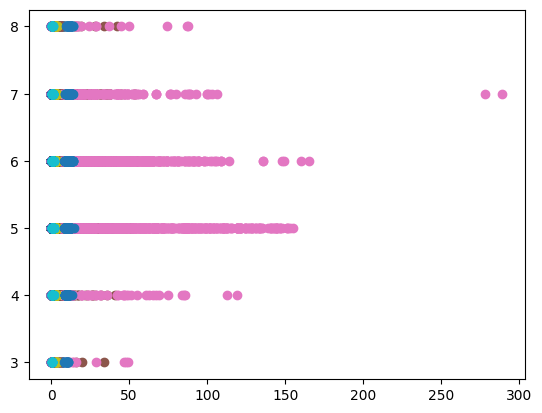

In [38]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for name in features:
    plt.scatter(dataset[name],dataset["quality"])
    plt.plot()


In [6]:
print(dataset["new_quality"].shape)
print(dataset["quality"].shape)

(1599,)
(1599,)


In [7]:
y = dataset["new_quality"]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: new_quality, dtype: int64

In [8]:
x= dataset.drop(columns = ["quality","new_quality"],axis = 1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test  =train_test_split(x,y,test_size = 0.2,random_state = 45)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [14]:
scaled_x_train.shape

(1279, 11)

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:

def model_training(x_train,y_train):
    model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(11,),activation='relu'),      
        keras.layers.Dense(1,activation = 'sigmoid'),
    ])

    model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics =['accuracy'])
    model.fit(x_train,y_train,epochs = 2000)
    return model

In [17]:
model = model_training(scaled_x_train,y_train)

Epoch 1/2000
40/40 [==============================] - 0s 641us/step - loss: 0.6812 - accuracy: 0.5715
Epoch 2/2000
40/40 [==============================] - 0s 615us/step - loss: 0.6636 - accuracy: 0.6341
Epoch 3/2000
40/40 [==============================] - 0s 615us/step - loss: 0.6480 - accuracy: 0.7037
Epoch 4/2000
40/40 [==============================] - 0s 615us/step - loss: 0.6325 - accuracy: 0.6927
Epoch 5/2000
40/40 [==============================] - 0s 615us/step - loss: 0.6179 - accuracy: 0.6990
Epoch 6/2000
40/40 [==============================] - 0s 615us/step - loss: 0.6027 - accuracy: 0.7107
Epoch 7/2000
40/40 [==============================] - 0s 641us/step - loss: 0.5896 - accuracy: 0.7091
Epoch 8/2000
40/40 [==============================] - 0s 640us/step - loss: 0.5791 - accuracy: 0.7170
Epoch 9/2000
40/40 [==============================] - 0s 641us/step - loss: 0.5707 - accuracy: 0.7279
Epoch 10/2000
40/40 [==============================] - 0s 667us/step - loss: 0.563

40/40 [==============================] - 0s 615us/step - loss: 0.5180 - accuracy: 0.7443
Epoch 81/2000
40/40 [==============================] - 0s 590us/step - loss: 0.5177 - accuracy: 0.7459
Epoch 82/2000
40/40 [==============================] - 0s 605us/step - loss: 0.5175 - accuracy: 0.7435
Epoch 83/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5174 - accuracy: 0.7428
Epoch 84/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5173 - accuracy: 0.7467
Epoch 85/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5166 - accuracy: 0.7482
Epoch 86/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5168 - accuracy: 0.7498
Epoch 87/2000
40/40 [==============================] - 0s 590us/step - loss: 0.5163 - accuracy: 0.7490
Epoch 88/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5160 - accuracy: 0.7435
Epoch 89/2000
40/40 [==============================] - 0s 641us/step - loss: 0.5156 - a

40/40 [==============================] - 0s 615us/step - loss: 0.5030 - accuracy: 0.7576
Epoch 160/2000
40/40 [==============================] - 0s 590us/step - loss: 0.5029 - accuracy: 0.7623
Epoch 161/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5030 - accuracy: 0.7568
Epoch 162/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5029 - accuracy: 0.7529
Epoch 163/2000
40/40 [==============================] - 0s 590us/step - loss: 0.5024 - accuracy: 0.7576
Epoch 164/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5021 - accuracy: 0.7561
Epoch 165/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5024 - accuracy: 0.7600
Epoch 166/2000
40/40 [==============================] - 0s 615us/step - loss: 0.5018 - accuracy: 0.7553
Epoch 167/2000
40/40 [==============================] - 0s 590us/step - loss: 0.5019 - accuracy: 0.7600
Epoch 168/2000
40/40 [==============================] - 0s 615us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4931 - accuracy: 0.7576
Epoch 238/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4930 - accuracy: 0.7615
Epoch 239/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4930 - accuracy: 0.7631
Epoch 240/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4922 - accuracy: 0.7608
Epoch 241/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4933 - accuracy: 0.7662
Epoch 242/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4928 - accuracy: 0.7545
Epoch 243/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4923 - accuracy: 0.7615
Epoch 244/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4924 - accuracy: 0.7592
Epoch 245/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4924 - accuracy: 0.7576
Epoch 246/2000
40/40 [==============================] - 0s 590us/step - loss: 0

40/40 [==============================] - 0s 641us/step - loss: 0.4860 - accuracy: 0.7600
Epoch 316/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4851 - accuracy: 0.7592
Epoch 317/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4866 - accuracy: 0.7592
Epoch 318/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4855 - accuracy: 0.7608
Epoch 319/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4857 - accuracy: 0.7568
Epoch 320/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4850 - accuracy: 0.7568
Epoch 321/2000
40/40 [==============================] - 0s 664us/step - loss: 0.4850 - accuracy: 0.7592
Epoch 322/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4848 - accuracy: 0.7568
Epoch 323/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4846 - accuracy: 0.7568
Epoch 324/2000
40/40 [==============================] - 0s 615us/step - loss: 0

40/40 [==============================] - 0s 590us/step - loss: 0.4797 - accuracy: 0.7576
Epoch 394/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4804 - accuracy: 0.7647
Epoch 395/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4789 - accuracy: 0.7600
Epoch 396/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4801 - accuracy: 0.7631
Epoch 397/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4803 - accuracy: 0.7592
Epoch 398/2000
40/40 [==============================] - 0s 623us/step - loss: 0.4809 - accuracy: 0.7608
Epoch 399/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4802 - accuracy: 0.7678
Epoch 400/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4793 - accuracy: 0.7670
Epoch 401/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4795 - accuracy: 0.7553
Epoch 402/2000
40/40 [==============================] - 0s 615us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4743 - accuracy: 0.7639
Epoch 472/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4756 - accuracy: 0.7623
Epoch 473/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4746 - accuracy: 0.7631
Epoch 474/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4748 - accuracy: 0.7662
Epoch 475/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4753 - accuracy: 0.7631
Epoch 476/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4744 - accuracy: 0.7623
Epoch 477/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4740 - accuracy: 0.7654
Epoch 478/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4744 - accuracy: 0.7662
Epoch 479/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4742 - accuracy: 0.7647
Epoch 480/2000
40/40 [==============================] - 0s 590us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4710 - accuracy: 0.7725
Epoch 550/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4698 - accuracy: 0.7654
Epoch 551/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4721 - accuracy: 0.7639
Epoch 552/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4707 - accuracy: 0.7654
Epoch 553/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4703 - accuracy: 0.7623
Epoch 554/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4717 - accuracy: 0.7670
Epoch 555/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4697 - accuracy: 0.7694
Epoch 556/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4708 - accuracy: 0.7639
Epoch 557/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4699 - accuracy: 0.7647
Epoch 558/2000
40/40 [==============================] - 0s 692us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4673 - accuracy: 0.7670
Epoch 628/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4673 - accuracy: 0.7670
Epoch 629/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4670 - accuracy: 0.7662
Epoch 630/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4673 - accuracy: 0.7654
Epoch 631/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4676 - accuracy: 0.7678
Epoch 632/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4672 - accuracy: 0.7678
Epoch 633/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4673 - accuracy: 0.7686
Epoch 634/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4666 - accuracy: 0.7678
Epoch 635/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4666 - accuracy: 0.7686
Epoch 636/2000
40/40 [==============================] - 0s 718us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4658 - accuracy: 0.7647
Epoch 706/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4656 - accuracy: 0.7678
Epoch 707/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4653 - accuracy: 0.7647
Epoch 708/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4651 - accuracy: 0.7654
Epoch 709/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4645 - accuracy: 0.7662
Epoch 710/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4658 - accuracy: 0.7701
Epoch 711/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4653 - accuracy: 0.7701
Epoch 712/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4653 - accuracy: 0.7701
Epoch 713/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4643 - accuracy: 0.7717
Epoch 714/2000
40/40 [==============================] - 0s 641us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4627 - accuracy: 0.7709
Epoch 784/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4624 - accuracy: 0.7694
Epoch 785/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4618 - accuracy: 0.7686
Epoch 786/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4623 - accuracy: 0.7686
Epoch 787/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4615 - accuracy: 0.7709
Epoch 788/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4622 - accuracy: 0.7678
Epoch 789/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4619 - accuracy: 0.7654
Epoch 790/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4619 - accuracy: 0.7670
Epoch 791/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4619 - accuracy: 0.7686
Epoch 792/2000
40/40 [==============================] - 0s 615us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4597 - accuracy: 0.7654
Epoch 862/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4602 - accuracy: 0.7694
Epoch 863/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4598 - accuracy: 0.7662
Epoch 864/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4600 - accuracy: 0.7686
Epoch 865/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4596 - accuracy: 0.7647
Epoch 866/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4601 - accuracy: 0.7670
Epoch 867/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4598 - accuracy: 0.7701
Epoch 868/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4601 - accuracy: 0.7678
Epoch 869/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4600 - accuracy: 0.7639
Epoch 870/2000
40/40 [==============================] - 0s 641us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4581 - accuracy: 0.7654
Epoch 940/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4585 - accuracy: 0.7670
Epoch 941/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4575 - accuracy: 0.7701
Epoch 942/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4580 - accuracy: 0.7662
Epoch 943/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4581 - accuracy: 0.7639
Epoch 944/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4581 - accuracy: 0.7686
Epoch 945/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4598 - accuracy: 0.7670
Epoch 946/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4579 - accuracy: 0.7639
Epoch 947/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4578 - accuracy: 0.7647
Epoch 948/2000
40/40 [==============================] - 0s 641us/step - loss: 0

40/40 [==============================] - 0s 615us/step - loss: 0.4563 - accuracy: 0.7662
Epoch 1018/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4568 - accuracy: 0.7662
Epoch 1019/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4565 - accuracy: 0.7662
Epoch 1020/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4558 - accuracy: 0.7654
Epoch 1021/2000
40/40 [==============================] - 0s 616us/step - loss: 0.4557 - accuracy: 0.7654
Epoch 1022/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4564 - accuracy: 0.7662
Epoch 1023/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4564 - accuracy: 0.7670
Epoch 1024/2000
40/40 [==============================] - 0s 692us/step - loss: 0.4560 - accuracy: 0.7701
Epoch 1025/2000
40/40 [==============================] - 0s 718us/step - loss: 0.4559 - accuracy: 0.7670
Epoch 1026/2000
40/40 [==============================] - 0s 842us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4551 - accuracy: 0.7662
Epoch 1096/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4540 - accuracy: 0.7670
Epoch 1097/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4538 - accuracy: 0.7709
Epoch 1098/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4560 - accuracy: 0.7662
Epoch 1099/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4539 - accuracy: 0.7694
Epoch 1100/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4547 - accuracy: 0.7694
Epoch 1101/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4544 - accuracy: 0.7678
Epoch 1102/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4539 - accuracy: 0.7647
Epoch 1103/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4540 - accuracy: 0.7654
Epoch 1104/2000
40/40 [==============================] - 0s 615us/step 

40/40 [==============================] - 0s 590us/step - loss: 0.4525 - accuracy: 0.7694
Epoch 1174/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4523 - accuracy: 0.7740
Epoch 1175/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4535 - accuracy: 0.7686
Epoch 1176/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4520 - accuracy: 0.7717
Epoch 1177/2000
40/40 [==============================] - 0s 618us/step - loss: 0.4523 - accuracy: 0.7678
Epoch 1178/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4529 - accuracy: 0.7701
Epoch 1179/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4524 - accuracy: 0.7733
Epoch 1180/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4520 - accuracy: 0.7725
Epoch 1181/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4518 - accuracy: 0.7694
Epoch 1182/2000
40/40 [==============================] - 0s 615us/step 

40/40 [==============================] - 0s 641us/step - loss: 0.4505 - accuracy: 0.7733
Epoch 1252/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4500 - accuracy: 0.7725
Epoch 1253/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4502 - accuracy: 0.7756
Epoch 1254/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4498 - accuracy: 0.7725
Epoch 1255/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4509 - accuracy: 0.7756
Epoch 1256/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4507 - accuracy: 0.7748
Epoch 1257/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4502 - accuracy: 0.7717
Epoch 1258/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4502 - accuracy: 0.7772
Epoch 1259/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4496 - accuracy: 0.7780
Epoch 1260/2000
40/40 [==============================] - 0s 615us/step 

40/40 [==============================] - 0s 590us/step - loss: 0.4481 - accuracy: 0.7803
Epoch 1330/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4493 - accuracy: 0.7803
Epoch 1331/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4474 - accuracy: 0.7764
Epoch 1332/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4489 - accuracy: 0.7748
Epoch 1333/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4484 - accuracy: 0.7740
Epoch 1334/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4475 - accuracy: 0.7772
Epoch 1335/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4483 - accuracy: 0.7780
Epoch 1336/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4486 - accuracy: 0.7756
Epoch 1337/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4482 - accuracy: 0.7733
Epoch 1338/2000
40/40 [==============================] - 0s 590us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4470 - accuracy: 0.7780
Epoch 1408/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4470 - accuracy: 0.7764
Epoch 1409/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4470 - accuracy: 0.7780
Epoch 1410/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4462 - accuracy: 0.7787
Epoch 1411/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4474 - accuracy: 0.7819
Epoch 1412/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4476 - accuracy: 0.7764
Epoch 1413/2000
40/40 [==============================] - 0s 642us/step - loss: 0.4468 - accuracy: 0.7787
Epoch 1414/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4463 - accuracy: 0.7717
Epoch 1415/2000
40/40 [==============================] - 0s 667us/step - loss: 0.4461 - accuracy: 0.7764
Epoch 1416/2000
40/40 [==============================] - 0s 718us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4450 - accuracy: 0.7834
Epoch 1486/2000
40/40 [==============================] - 0s 614us/step - loss: 0.4470 - accuracy: 0.7764
Epoch 1487/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4450 - accuracy: 0.7795
Epoch 1488/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4463 - accuracy: 0.7764
Epoch 1489/2000
40/40 [==============================] - 0s 667us/step - loss: 0.4444 - accuracy: 0.7787
Epoch 1490/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4447 - accuracy: 0.7787
Epoch 1491/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4453 - accuracy: 0.7826
Epoch 1492/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4453 - accuracy: 0.7756
Epoch 1493/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4451 - accuracy: 0.7803
Epoch 1494/2000
40/40 [==============================] - 0s 641us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4434 - accuracy: 0.7795
Epoch 1564/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4430 - accuracy: 0.7780
Epoch 1565/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4429 - accuracy: 0.7881
Epoch 1566/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4419 - accuracy: 0.7858
Epoch 1567/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4432 - accuracy: 0.7780
Epoch 1568/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4426 - accuracy: 0.7787
Epoch 1569/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4436 - accuracy: 0.7858
Epoch 1570/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4429 - accuracy: 0.7803
Epoch 1571/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4432 - accuracy: 0.7811
Epoch 1572/2000
40/40 [==============================] - 0s 615us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4424 - accuracy: 0.7826
Epoch 1642/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4431 - accuracy: 0.7850
Epoch 1643/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4420 - accuracy: 0.7858
Epoch 1644/2000
40/40 [==============================] - 0s 674us/step - loss: 0.4427 - accuracy: 0.7811
Epoch 1645/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4406 - accuracy: 0.7850
Epoch 1646/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4415 - accuracy: 0.7866
Epoch 1647/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4425 - accuracy: 0.7803
Epoch 1648/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4419 - accuracy: 0.7811
Epoch 1649/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4417 - accuracy: 0.7819
Epoch 1650/2000
40/40 [==============================] - 0s 615us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4410 - accuracy: 0.7787
Epoch 1720/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4400 - accuracy: 0.7873
Epoch 1721/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4410 - accuracy: 0.7819
Epoch 1722/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4403 - accuracy: 0.7897
Epoch 1723/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4401 - accuracy: 0.7819
Epoch 1724/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4410 - accuracy: 0.7881
Epoch 1725/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4405 - accuracy: 0.7873
Epoch 1726/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4399 - accuracy: 0.7897
Epoch 1727/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4410 - accuracy: 0.7850
Epoch 1728/2000
40/40 [==============================] - 0s 615us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4391 - accuracy: 0.7873
Epoch 1798/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4390 - accuracy: 0.7897
Epoch 1799/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4405 - accuracy: 0.7873
Epoch 1800/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4386 - accuracy: 0.7881
Epoch 1801/2000
40/40 [==============================] - 0s 674us/step - loss: 0.4391 - accuracy: 0.7850
Epoch 1802/2000
40/40 [==============================] - 0s 718us/step - loss: 0.4384 - accuracy: 0.7873
Epoch 1803/2000
40/40 [==============================] - 0s 769us/step - loss: 0.4393 - accuracy: 0.7795
Epoch 1804/2000
40/40 [==============================] - 0s 692us/step - loss: 0.4390 - accuracy: 0.7866
Epoch 1805/2000
40/40 [==============================] - 0s 769us/step - loss: 0.4390 - accuracy: 0.7873
Epoch 1806/2000
40/40 [==============================] - 0s 718us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4377 - accuracy: 0.7842
Epoch 1876/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4374 - accuracy: 0.7881
Epoch 1877/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4378 - accuracy: 0.7834
Epoch 1878/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4392 - accuracy: 0.7858
Epoch 1879/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4354 - accuracy: 0.7952
Epoch 1880/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4369 - accuracy: 0.7897
Epoch 1881/2000
40/40 [==============================] - 0s 617us/step - loss: 0.4383 - accuracy: 0.7842
Epoch 1882/2000
40/40 [==============================] - 0s 641us/step - loss: 0.4382 - accuracy: 0.7795
Epoch 1883/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4376 - accuracy: 0.7866
Epoch 1884/2000
40/40 [==============================] - 0s 667us/step 

40/40 [==============================] - 0s 615us/step - loss: 0.4355 - accuracy: 0.7858
Epoch 1954/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4361 - accuracy: 0.7850
Epoch 1955/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4356 - accuracy: 0.7889
Epoch 1956/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4365 - accuracy: 0.7873
Epoch 1957/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4355 - accuracy: 0.7866
Epoch 1958/2000
40/40 [==============================] - 0s 590us/step - loss: 0.4355 - accuracy: 0.7881
Epoch 1959/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4366 - accuracy: 0.7858
Epoch 1960/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4369 - accuracy: 0.7811
Epoch 1961/2000
40/40 [==============================] - 0s 615us/step - loss: 0.4359 - accuracy: 0.7842
Epoch 1962/2000
40/40 [==============================] - 0s 615us/step 

In [24]:
def get_data():
    features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
    input_data = []

    for names in features:
        print(names)
        input_data.append(float(input("Enter : ")))
    return input_data


def prediction():
    input_data = get_data()
    pred1 = model.predict([input_data])
    all_pred = [pred1]
    for predictions in all_pred:
        if predictions[0] ==1:
            print("Good quality")
        else :
            print("Bad quality")

In [28]:
prediction()

# Prediction

fixed acidity

Enter : 7.3

volatile acidity

Enter : 0.65

citric acid

Enter : 0.0

residual sugar

Enter : 1.2

chlorides

Enter : 0.065

free sulfur dioxide

Enter : 15.0

total sulfur dioxide

Enter : 21.0

density

Enter : 0.9946

pH

Enter : 3.39

sulphates

Enter : 0.47

alcohol

Enter : 10.0

1/1 [==============================] - 0s 20ms/step

Good quality